In [2]:
#库的导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#输入数据的导入
df = pd.read_excel(r"shujuji_test.xlsx")
df.columns = ["id","temperature", "flow", "PH", "data_in_COD", "NH3_N","total_nitrogen","data_out_COD"]
temperature = df["temperature"]
temperature = np.array(temperature)
flow = df["flow"]
flow = np.array(flow)
ph=df["PH"]
ph=np.array(ph)
datainCOD = df["data_in_COD"]
datainCOD =np.array(datainCOD)
nh3n = df["NH3_N"]
nh3n = np.array(nh3n)
totalNitrogen = df["total_nitrogen"]
totalNitrogen = np.array(totalNitrogen)
cod = df["data_out_COD"]
cod = np.array(cod)
samplein = np.mat([temperature,flow,ph,datainCOD,nh3n,totalNitrogen])
sampleinminmax = np.array([samplein.min(axis=1).T.tolist()[0],samplein.max(axis=1).T.tolist()[0]]).transpose()
sampleout = np.mat([cod])
sampleoutminmax = np.array([sampleout.min(axis=1).T.tolist()[0],sampleout.max(axis=1).T.tolist()[0]]).transpose()

In [16]:
#导入FNN.py训练好的参数
c1=np.load('c1.npy')
b1=np.load('b1.npy')
w1=np.load('w1.npy')
c1 = np.mat(c1)
b1 = np.mat(b1)
w1 = np.mat(w1)
print("c1:",c1)
print("b1:",b1)
print("w1:",w1)

c1: [[-0.11763254 -0.49810567 -0.45849161  0.65728866 -0.68573809 -0.28883526]
 [ 0.52723463 -0.5568984  -0.27207985 -0.17373719 -0.81979591 -0.11522802]
 [ 0.2805495  -0.93148622 -0.82549264 -0.52229972 -0.36023927  0.89579269]]
b1: [[ 0.50421136  0.04768261  0.51490338  0.83975097  0.94747674  0.52749621]
 [-0.24776487  0.70507268 -0.89190032  0.94978794 -0.50571287 -0.34993357]
 [ 0.16827705 -0.01215262  0.46566657 -0.41311576 -0.1007863  -0.94760938]]
w1: [[0.06310242 0.33598593 0.3741046  0.30695865 0.5527255  0.68555375
  0.87250358 0.22899316 0.89034831 0.45434713 0.03473622 0.91515288
  0.20813252 0.76817442 0.49702147 0.49744055 1.0944954  0.13460148
  0.5816658  0.02724415 0.37701882 0.11130811 0.67471818 0.79463702
  0.18052581]]


In [17]:
#测试数据数量
testnum = 24
#测试数据的导入
df = pd.read_excel(r"shujuji_test.xlsx")
df.columns = ["id","temperature", "flow", "PH", "data_in_COD", "NH3_N","total_nitrogen","data_out_COD"]
temperature = df["temperature"]
temperature = np.array(temperature)
flow = df["flow"]
flow = np.array(flow)
ph=df["PH"]
ph=np.array(ph)
datainCOD = df["data_in_COD"]
datainCOD =np.array(datainCOD)
nh3n = df["NH3_N"]
nh3n = np.array(nh3n)
totalNitrogen = df["total_nitrogen"]
totalNitrogen = np.array(totalNitrogen)
cod = df["data_out_COD"]
cod = np.array(cod)
input = np.mat([temperature,flow,ph,datainCOD,nh3n,totalNitrogen])
inputnorm=(np.array(input.T)-sampleinminmax.transpose()[0])/(sampleinminmax.transpose()[1]-sampleinminmax.transpose()[0])

In [18]:
S =3  #模糊分级个数
T = 25  ##规则生成层、归一化层节点数

In [19]:
#进行预测
out = np.zeros((inputnorm.shape[0],1))
u = np.zeros((S, inputnorm.shape[1]))
# 隶属度函数计算层计算输出
for m in range(inputnorm.shape[0]):
    for i in range(S):
        for j in range(inputnorm.shape[1]):
            u[i][j] = np.exp((-1) * ((inputnorm[m, j] - c1[i,j]) ** 2) / (b1[i,j] ** 2))
    #规则生成层
    alpha = np.zeros((T, 1))
    for i in range(S):
        a = 1
        if i == 1:
            a = 8
        for p in range(S):
            b = 1
            if p == 1:
                b = 4
            for q in range(S):
                c = 1
                if q == 1:
                    c = 2
                for k in range(S):
                    alpha[i * a + p * b + q * c + k] = u[i][0] * u[p][1] * u[q][2] * u[k][3]

    #归一化层
    alphasum = np.sum(alpha)
    alpha1 = np.zeros((T, 1))
    for d in range(T):
        alpha1[d] = alpha[d] / alphasum
    #输出层
    out[m] = np.dot(w1, alpha1)
#对输出结果进行反归一化
out = np.array(out)
diff = sampleoutminmax[:,1]-sampleoutminmax[:,0]
networkout2 = out*diff+sampleoutminmax[0][0]
networkout2 = np.array(networkout2).transpose()
output1=networkout2.flatten()#降成一维数组
output1=output1.tolist()
for i in range(testnum):
    output1[i] = float('%.2f'%output1[i])
print("the prediction is:",output1)

the prediction is: [33.19, 35.43, 35.5, 34.92, 33.84, 33.7, 33.68, 33.73, 33.9, 33.73, 33.34, 36.02, 34.39, 34.93, 35.51, 36.95, 34.51, 37.65, 34.92, 36.0, 36.81, 33.54, 33.67, 34.13, 33.92611546436928, 35.85525785076186, 34.83969929497552, 34.96831979350763, 35.05516203234443, 34.90719000404136, 34.94360499293173, 36.937424434263136, 35.53343136859914, 33.83509777249499, 34.95422245452585, 34.97340292270295, 35.75173711538963, 34.101975241393205, 33.8015829868503, 34.90325107958729, 34.845431504241404, 34.0755859894666, 34.80996448144167, 36.114465937326464, 33.820686863894785, 34.902147951932065, 34.13863777842828, 34.929374564799026, 34.9207854217201, 33.3632707571807, 32.39752542375595, 34.84025098466448, 35.35653778281182, 33.237497001921845, 34.92699562062423, 36.380690763533686, 34.940586456004, 33.72641909257331, 34.15461426935697, 34.73537991618146, 34.90919802626125, 36.96502923540548, 33.395699431561866, 33.833278251510855, 36.17389035767716, 34.1769600507996, 33.80621595814

In [20]:
#将输出结果与真实值进行对比，计算误差
output=cod
print(output.shape)
rmse = (np.sum(np.square(output-output1))/len(output)) ** 0.5
mae = np.sum(np.abs(output-output1))/len(output)
average_loss1=np.sum(np.abs((output-output1)/output))/len(output)
mape="%.2f%%"%(average_loss1*100)
f1 = 0
for m in range(testnum):
    f1 = f1 + np.abs(output[m]-output1[m])/((np.abs(output[m])+np.abs(output1[m]))/2)
f2 = f1 / testnum
smape="%.2f%%"%(f2*100)

(72,)


In [21]:
loss_every=np.abs(output-output1)
#print(loss_every)
output_loss=loss_every.flatten()#降成一维数组
output_loss=output_loss.tolist()
for i in range(len(output_loss)):
    output_loss[i] = float('%.2f'%output_loss[i])
print("the loss is :",output_loss)

print("the MAE is :",mae) #平均绝对误差
print("the RMSE is :",rmse) #均方根误差
print("the MAPE is :",mape) #平均绝对百分比误差
print("the SMAPE is :",smape) #对称平均绝对百分比误差

the loss is : [7.6, 14.34, 13.64, 10.79, 9.95, 4.79, 8.33, 9.08, 12.08, 9.58, 10.63, 9.34, 13.21, 10.87, 4.31, 8.69, 3.39, 5.37, 6.72, 7.3, 4.5, 9.71, 11.34, 10.78, 6.61, 3.55, 7.52, 12.29, 13.56, 3.22, 0.94, 7.72, 2.31, 1.29, 4.37, 5.41, 4.06, 3.78, 14.96, 5.17, 0.62, 8.09, 13.12, 3.82, 3.68, 6.42, 13.91, 5.28, 13.34, 4.68, 2.31, 9.42, 13.24, 4.25, 0.08, 7.25, 9.64, 0.14, 0.94, 0.3, 8.69, 2.03, 2.35, 4.81, 6.76, 7.56, 12.1, 5.92, 7.7, 0.26, 7.0, 9.58]
the MAE is : 7.0605558516953275
the RMSE is : 8.141695812485443
the MAPE is : 22.67%
the SMAPE is : 26.51%


In [22]:
#计算预测值与真实值误差与真实值之比的分布
A=0
B=0
C=0
D=0
E=0
for m in range(testnum):
    y1 = np.abs(output[m]-output1[m])/np.abs(output[m])
    if y1 <= 0.1:
        A = A + 1
    elif y1 > 0.1 and y1 <= 0.2:
        B = B + 1
    elif y1 > 0.2 and y1 <= 0.3:
        C = C + 1
    elif y1 > 0.3 and y1 <= 0.4:
        D = D + 1
    else:
        E = E + 1
print("Ratio <= 0.1 :",A)
print("0.1< Ratio <= 0.2 :",B)
print("0.2< Ratio <= 0.3 :",C)
print("0.3< Ratio <= 0.4 :",D)
print("Ratio > 0.4 :",E)

Ratio <= 0.1 : 1
0.1< Ratio <= 0.2 : 6
0.2< Ratio <= 0.3 : 9
0.3< Ratio <= 0.4 : 3
Ratio > 0.4 : 5


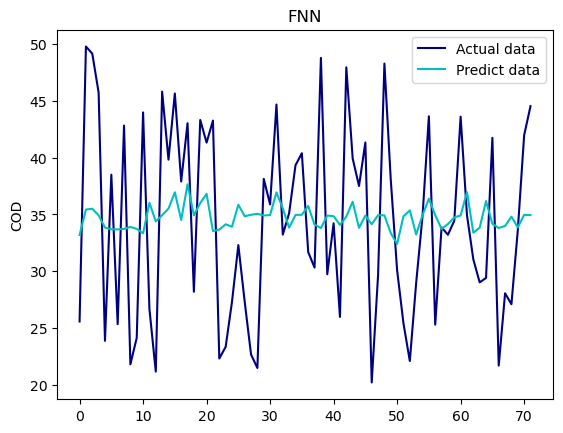

In [23]:
#画图
plt.figure()
plt.title("FNN")
plt.plot(list(range(len(output))), output, color='#000080',label='Actual data')  
plt.plot(list(range(len(output))), output1, color='#00BFBF',label='Predict data')  
plt.ylabel("COD")
plt.legend()
plt.show()

In [24]:
print(output)

data = {"y_test1": output, "y_predict_FNN": output1}
print(data)
frame = pd.DataFrame(data)
frame.to_csv("FNN_data.csv", index = False)

[25.5872 49.7674 49.1354 45.7133 23.8893 38.4926 25.3508 42.8149 21.8228
 24.1469 43.9699 26.6769 21.1781 45.7951 39.8176 45.6353 37.8993 43.0188
 28.2014 43.3048 41.3138 43.2491 22.3307 23.3522 27.3195 32.3059 27.322
 22.6818 21.4972 38.1243 35.8833 44.6618 33.2272 35.1209 39.3255 40.3839
 31.6909 30.3252 48.764  29.7371 34.2237 25.9877 47.9309 39.931  37.5022
 41.3256 20.2241 29.6502 48.264  38.0447 30.0919 25.4234 22.1134 28.9857
 34.8451 43.6294 25.3052 33.8639 33.2145 34.4399 43.5968 34.937  31.0479
 29.0264 29.4125 41.7376 21.7104 28.0662 27.1045 33.5931 41.9565 44.5185]
{'y_test1': array([25.5872, 49.7674, 49.1354, 45.7133, 23.8893, 38.4926, 25.3508,
       42.8149, 21.8228, 24.1469, 43.9699, 26.6769, 21.1781, 45.7951,
       39.8176, 45.6353, 37.8993, 43.0188, 28.2014, 43.3048, 41.3138,
       43.2491, 22.3307, 23.3522, 27.3195, 32.3059, 27.322 , 22.6818,
       21.4972, 38.1243, 35.8833, 44.6618, 33.2272, 35.1209, 39.3255,
       40.3839, 31.6909, 30.3252, 48.764 , 29.7371, 34